###### The business task of this project is to analyze the Sales Report from 12 months worth of data. the data comes in
###### 12 individual files representing the sales of that month, and my job is to analyze the data and give recommendation per 
###### question asked

# Sales Report

### importing libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


###### task no.1 merging 12 months worth of data into one folder

In [3]:
jan_data = pd.read_csv("Sales_Report/Sales_January_2019.csv")
feb_data = pd.read_csv("Sales_Report/Sales_February_2019.csv")
mar_data = pd.read_csv("Sales_Report/Sales_March_2019.csv")
apr_data = pd.read_csv("Sales_Report/Sales_April_2019.csv")
may_data = pd.read_csv("Sales_Report/Sales_May_2019.csv")
jun_data = pd.read_csv("Sales_Report/Sales_June_2019.csv")
jul_data = pd.read_csv("Sales_Report/Sales_July_2019.csv")
aug_data = pd.read_csv("Sales_Report/Sales_August_2019.csv")
sep_data = pd.read_csv("Sales_Report/Sales_September_2019.csv")
oct_data = pd.read_csv("Sales_Report/Sales_October_2019.csv")
nov_data = pd.read_csv("Sales_Report/Sales_November_2019.csv")
dec_data = pd.read_csv("Sales_Report/Sales_December_2019.csv")

In [4]:
all_data = pd.concat([jan_data, feb_data, mar_data, apr_data, may_data, 
                      jun_data, jul_data, aug_data, sep_data, oct_data, 
                      nov_data, dec_data])

##### or we can use a for loop

In [26]:
files = [file for file in os.listdir("./Sales_Report/")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Report/"+file)
    all_months_data = pd.concat([all_months_data, df])


In [5]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


### Saving and loading the updated data 

In [6]:
all_data.to_csv("./Sales_Report/Total Months.csv", index = False)
total_months = pd.read_csv("./Sales_Report/Total Months.csv")

### Cleaning the data

###### 1. dropping the NAN values

In [7]:
nan_df = total_months[total_months.isna().any(axis=1)]
total_months = total_months.dropna(how='all')


###### 2. Finding "Or" value and deleting it

In [8]:
total_months = total_months[total_months['Order Date'].str[0:2] != 'Or']



###### 3. Converting the 'Quantity Ordered' and 'Price Each' columns to their correct data types

In [9]:
total_months['Quantity Ordered'] = pd.to_numeric(total_months['Quantity Ordered']) #to int
total_months['Price Each'] = pd.to_numeric(total_months['Price Each']) #to float

###### 4. Creating a month column

In [10]:
total_months['Month'] = total_months['Order Date'].str[0:2]
total_months['Month'] = total_months['Month'].astype('int32')

### Task no2. What was the highest earning month, and how much was the amount earned 

##### 1st we create a column that will represent the total amount sold

In [11]:
total_months['Sales'] = total_months['Quantity Ordered'] * total_months['Price Each']

###### re-ordering the columns on my data Frame

In [12]:
total_months = total_months[['Order ID', 'Product', 'Month','Quantity Ordered', 'Price Each', 'Sales', 'Order Date',
                             'Purchase Address']]
total_months

,Order ID,Product,Month,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address
0,141234,iPhone,1,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,1,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,12,1,14.95,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),12,2,3.84,7.68,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,12,1,400.00,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,12,1,11.99,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


###### summing all the month's sales together and grouping the data by months

In [13]:
results = total_months.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


###### Creating a visualization of my findings

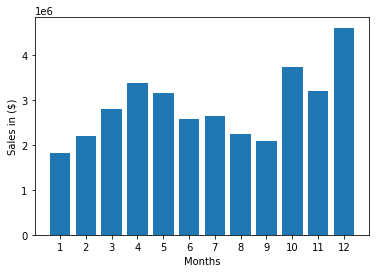

In [14]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in ($)')
plt.show()

###### from the above analysis we can see that the highest earning month was December

### task no3. Which city had the had the highest number of sales

In [15]:
total_months

,Order ID,Product,Month,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address
0,141234,iPhone,1,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,1,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,12,1,14.95,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),12,2,3.84,7.68,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,12,1,400.00,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,12,1,11.99,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


###### creating a column that has names of cities and state only

In [16]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

total_months['City'] = total_months['Purchase Address'].apply(lambda x: get_city(x)+ ' (' + get_state(x) + ')')

total_months.head()


,Order ID,Product,Month,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City
0,141234,iPhone,1,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Boston (MA)
1,141235,Lightning Charging Cable,1,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Portland (OR)
2,141236,Wired Headphones,1,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",San Francisco (CA)
3,141237,27in FHD Monitor,1,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Los Angeles (CA)
4,141238,Wired Headphones,1,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Austin (TX)


###### summing all the city's sales together and grouping them by cities

In [17]:
results = total_months.groupby('City').sum()
results

,Month,Quantity Ordered,Price Each,Sales
City,,,,
Atlanta (GA),104794,16602,2779908.20,2795498.58
Austin (TX),69829,11153,1809873.61,1819581.75
Boston (MA),141112,22528,3637409.77,3661642.01
Dallas (TX),104620,16730,2752627.82,2767975.40
Los Angeles (CA),208325,33289,5421435.23,5452570.80
New York City (NY),175741,27932,4635370.83,4664317.43
Portland (ME),17144,2750,447189.25,449758.27
Portland (OR),70621,11303,1860558.22,1870732.34
San Francisco (CA),315520,50239,8211461.74,8262203.91


###### creating visualization from my findings

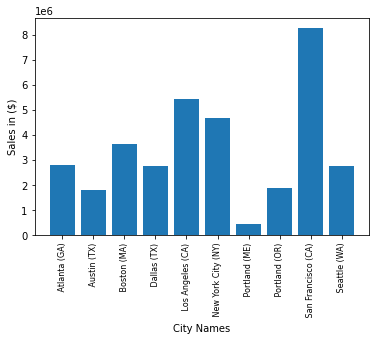

In [18]:
cities = [city for city, df in total_months.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('City Names')
plt.ylabel('Sales in ($)')
plt.show()

###### from the above analysis, we can see that San Francisco (CA) was the city with the most sales 

### Task no.4 What time should we desplay adverts to maximize the likelihood of customer's buying product

In [19]:
total_months

,Order ID,Product,Month,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City
0,141234,iPhone,1,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Boston (MA)
1,141235,Lightning Charging Cable,1,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Portland (OR)
2,141236,Wired Headphones,1,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",San Francisco (CA)
3,141237,27in FHD Monitor,1,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Los Angeles (CA)
4,141238,Wired Headphones,1,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Austin (TX)
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,12,1,14.95,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",San Francisco (CA)
186846,319667,AA Batteries (4-pack),12,2,3.84,7.68,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Los Angeles (CA)
186847,319668,Vareebadd Phone,12,1,400.00,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Seattle (WA)
186848,319669,Wired Headphones,12,1,11.99,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Dallas (TX)


###### 1. Converting 'Order Date' column to a DateTime object

In [20]:
total_months['Order Date'] = pd.to_datetime(total_months['Order Date'])

###### 2. Grabbing the hour, from the datetime object

In [21]:
total_months['hours'] = total_months['Order Date'].dt.hour
total_months

,Order ID,Product,Month,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,hours
0,141234,iPhone,1,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston (MA),21
1,141235,Lightning Charging Cable,1,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland (OR),14
2,141236,Wired Headphones,1,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco (CA),13
3,141237,27in FHD Monitor,1,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles (CA),20
4,141238,Wired Headphones,1,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin (TX),11
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,12,1,14.95,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",San Francisco (CA),20
186846,319667,AA Batteries (4-pack),12,2,3.84,7.68,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",Los Angeles (CA),12
186847,319668,Vareebadd Phone,12,1,400.00,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",Seattle (WA),6
186848,319669,Wired Headphones,12,1,11.99,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",Dallas (TX),10


###### 3. visualizing the data, grouping by hours

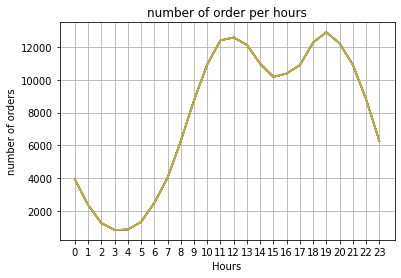

In [22]:
hours = [hour for hour, df in total_months.groupby(['hours'])]

plt.plot(hours, total_months.groupby(['hours']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('number of orders')
plt.title('number of order per hours')
plt.show()


###### base on the above analysis, we recomend that the company displays its adverts between 11am and 7pm

### Task no.5 Which products are most often sold together

In [23]:
total_months

,Order ID,Product,Month,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,hours
0,141234,iPhone,1,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston (MA),21
1,141235,Lightning Charging Cable,1,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland (OR),14
2,141236,Wired Headphones,1,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco (CA),13
3,141237,27in FHD Monitor,1,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles (CA),20
4,141238,Wired Headphones,1,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin (TX),11
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,12,1,14.95,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",San Francisco (CA),20
186846,319667,AA Batteries (4-pack),12,2,3.84,7.68,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",Los Angeles (CA),12
186847,319668,Vareebadd Phone,12,1,400.00,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",Seattle (WA),6
186848,319669,Wired Headphones,12,1,11.99,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",Dallas (TX),10


###### 1. create a data frame with data that share the same 'Order ID'

In [27]:
df = total_months[total_months['Order ID'].duplicated(keep=False)]

###### 2. Group items that fall under the same 'Order ID' together, and give them a column

In [34]:
df['Purchased Items'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

KeyError: 'Column not found: Product'

###### 3. Dropping duplicates 

In [37]:
df = df[['Order ID', 'Purchased Items']].drop_duplicates()

###### Inserting libraries to help me iterate throught strings

In [40]:
from itertools import combinations
from collections import Counter

###### 4. counting the two products that are most sold together

In [43]:
count = Counter()

for row in df['Purchased Items']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)




('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Which product is the most sold product, and why?

In [45]:
total_months

,Order ID,Product,Month,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,hours
0,141234,iPhone,1,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston (MA),21
1,141235,Lightning Charging Cable,1,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland (OR),14
2,141236,Wired Headphones,1,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco (CA),13
3,141237,27in FHD Monitor,1,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles (CA),20
4,141238,Wired Headphones,1,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin (TX),11
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,12,1,14.95,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",San Francisco (CA),20
186846,319667,AA Batteries (4-pack),12,2,3.84,7.68,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",Los Angeles (CA),12
186847,319668,Vareebadd Phone,12,1,400.00,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",Seattle (WA),6
186848,319669,Wired Headphones,12,1,11.99,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",Dallas (TX),10


###### 1. Grouping all the products together

In [53]:
grouped_products = total_months.groupby('Product')

###### 2. Summing all the orders of a product

In [ ]:
Quantity_Ordered = grouped_products.sum()['Quantity Ordered']

###### 3. Visualizing the data

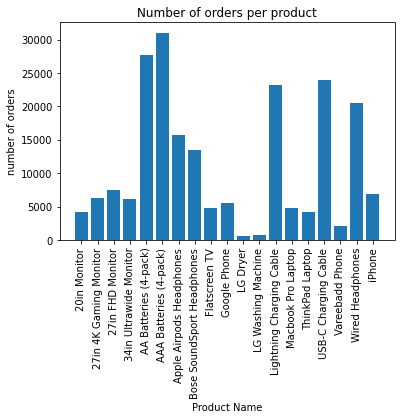

In [59]:
products = [products for products, df in grouped_products]

plt.bar(products, Quantity_Ordered)
plt.xticks(products, rotation='vertical')
plt.xlabel('Product Name')
plt.ylabel('number of orders')
plt.title('Number of orders per product')
plt.show()




###### From our analysis, we can see the the most ordered product is 'AAA Batteries (4-pack)'.....reason being that most gadgets in a house hold
###### are battery powered

# THE END